<small><small><i>
All the IPython Notebooks in **Python Data Analytics Projects** lecture series by **[Dr. Milaan Parmar](https://www.linkedin.com/in/milaanparmar/)** are available @ **[GitHub](https://github.com/milaan9/93_Python_Data_Analytics_Projects)**
</i></small></small>

# English to French Translation

### STEP 1: IMPORTING LIBRARIES

In [1]:
!pip install tensorflow
!pip install --upgrade tensorflow-gpu==2.0
!pip install nltk 
!pip install gensim

!pip install spacy
!pip install plotly
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install wordcloud
!pip install jupyterthemes
!pip install sklearn

import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')
nltk.download('stopwords')

  Using cached tensorflow_estimator-2.7.0-py2.py3-none-any.whl (463 kB)
  Using cached tensorboard-2.7.0-py3-none-any.whl (5.8 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.0.1
    Uninstalling tensorflow-estimator-2.0.1:
      Successfully uninstalled tensorflow-estimator-2.0.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.0.2
    Uninstalling tensorboard-2.0.2:
      Successfully uninstalled tensorboard-2.0.2
  Attempting uninstall: gast
    Found existing installation: gast 0.2.2
    Uninstalling gast-0.2.2:
      Successfully uninstalled gast-0.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-gpu 2.0.0 requires gast==0.2.2, but you have gast 0.4.0 which is incompatible.
tensorflow-gpu 2.0.0 require

True

In [2]:
from collections import Counter
import operator
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, TimeDistributed, RepeatVector, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

### STEP 2: LOADING THE DATASET

In [3]:
df_english = pd.read_csv('data/vocab_en.csv', sep = '\t', names = ['english'])
df_french = pd.read_csv('data/vocab_fr.csv', sep = '\t', names = ['french'])

In [4]:
# CHECKING IF NULL ELEMENTS ARE PRESENT OR NOT IN BOTH DATASETS
df_english.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137860 entries, 0 to 137859
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   english  137860 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


In [5]:
df_french.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137860 entries, 0 to 137859
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   french  137860 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


In [6]:
# THUS WE HAVE NO NULL ELEMENTS PRESENT
# CONCATENATING BOTH THE DATAFRAMES (df_english and df_french)
df = pd.DataFrame([df_english['english'],df_french['french']])
df = df.T
df

,english,french
0,"new jersey is sometimes quiet during autumn , ...",new jersey est parfois calme pendant l' automn...
1,the united states is usually chilly during jul...,les états-unis est généralement froid en juill...
2,"california is usually quiet during march , and...","california est généralement calme en mars , et..."
3,the united states is sometimes mild during jun...,"les états-unis est parfois légère en juin , et..."
4,"your least liked fruit is the grape , but my l...","votre moins aimé fruit est le raisin , mais mo..."
...,...,...
137855,"france is never busy during march , and it is ...","la france est jamais occupée en mars , et il e..."
137856,"india is sometimes beautiful during spring , a...","l' inde est parfois belle au printemps , et il..."
137857,"india is never wet during summer , but it is s...","l' inde est jamais mouillé pendant l' été , ma..."
137858,"france is never chilly during january , but it...","la france est jamais froid en janvier , mais i..."


### STEP 3: PERFORMING DATA CLEANING

In [7]:
# REMOVING PUNCTUATIONS FROM OUR TEXT

def remove_punc(x):
    return re.sub('[!#?,.:";"]', "", x)

df['french'] = df['french'].apply(remove_punc)
df['english'] = df['english'].apply(remove_punc)

In [8]:
# CHECKINH HOW MANY UNIQUE WORDS ARE PRESENT IN THE ENGLISH DICTIONARY
english_words = []
for i in df['english'].values:
    for j in i.split(" "):
        english_words.append(j)
english_words = list(set(english_words))
english_words = english_words[1:]

len(english_words)

199

In [9]:
french_words = []
for i in df['french'].values:
    for j in i.split(" "):
        french_words.append(j)
french_words = list(set(french_words))
french_words = french_words[1:]

len(french_words)

350

In [10]:
english_words

['our',
 'when',
 'pears',
 'fall',
 'monkeys',
 'cats',
 'lake',
 'driving',
 'bird',
 'rusty',
 'peach',
 'likes',
 'new',
 'how',
 'rabbit',
 'french',
 'would',
 'snakes',
 'snake',
 'chilly',
 'translating',
 'usually',
 'we',
 'dog',
 'has',
 'old',
 'china',
 'freezing',
 'india',
 'easy',
 'grapefruit',
 'do',
 'apples',
 'december',
 'spring',
 'mild',
 'states',
 'september',
 'is',
 'peaches',
 'disliked',
 'think',
 'most',
 'grocery',
 'difficult',
 'dislike',
 'january',
 'quiet',
 'little',
 'fruit',
 'autumn',
 'black',
 'animals',
 'she',
 'drives',
 'pleasant',
 'blue',
 'portuguese',
 'mice',
 'in',
 'june',
 'jersey',
 'horse',
 'relaxing',
 'summer',
 'you',
 "isn't",
 'plan',
 'oranges',
 'big',
 'but',
 'nice',
 'and',
 'red',
 'why',
 'her',
 'warm',
 'automobile',
 'thinks',
 'drove',
 'california',
 'france',
 'translate',
 'green',
 'banana',
 'they',
 'i',
 'this',
 'during',
 'car',
 'go',
 'bears',
 'rainy',
 'sometimes',
 'bananas',
 'english',
 'shark',


### STEP 4: VISUALIZING DATASET

In [11]:
# GETING FREQUENCY OF EACH WORD
words = []
for i in df['english']:
    for word in i.split():
        words.append(word)
    
english_words_counts = Counter(words)

english_words_counts = sorted(english_words_counts.items(), key = operator.itemgetter(1), reverse = True)



In [12]:
english_words_counts

[('is', 205858),
 ('in', 75525),
 ('it', 75137),
 ('during', 74933),
 ('the', 67628),
 ('but', 63987),
 ('and', 59850),
 ('sometimes', 37746),
 ('usually', 37507),
 ('never', 37500),
 ('favorite', 28332),
 ('least', 27564),
 ('fruit', 27192),
 ('most', 14934),
 ('loved', 14166),
 ('liked', 14046),
 ('new', 12197),
 ('paris', 11334),
 ('india', 11277),
 ('united', 11270),
 ('states', 11270),
 ('california', 11250),
 ('jersey', 11225),
 ('france', 11170),
 ('china', 10953),
 ('he', 10786),
 ('she', 10786),
 ('grapefruit', 10692),
 ('your', 9734),
 ('my', 9700),
 ('his', 9700),
 ('her', 9700),
 ('fall', 9134),
 ('june', 9133),
 ('spring', 9102),
 ('january', 9090),
 ('winter', 9038),
 ('march', 9023),
 ('autumn', 9004),
 ('may', 8995),
 ('nice', 8984),
 ('september', 8958),
 ('july', 8956),
 ('april', 8954),
 ('november', 8951),
 ('summer', 8948),
 ('december', 8945),
 ('february', 8942),
 ('our', 8932),
 ('their', 8932),
 ('freezing', 8928),
 ('pleasant', 8916),
 ('beautiful', 8915),
 ('

In [13]:
# APPENDING VALUES TO DIFFERENT LISTS FOR VISUALIZATION PURPOSES
english_words = []
english_counts = []
for i in range(len(english_words_counts)):
    english_words.append(english_words_counts[i][0])
    english_counts.append(english_words_counts[i][1])

In [14]:
# PLOTTING BARPLOT USING PLOTLY
fig = px.bar(x = english_words, y = english_counts)
fig.show()

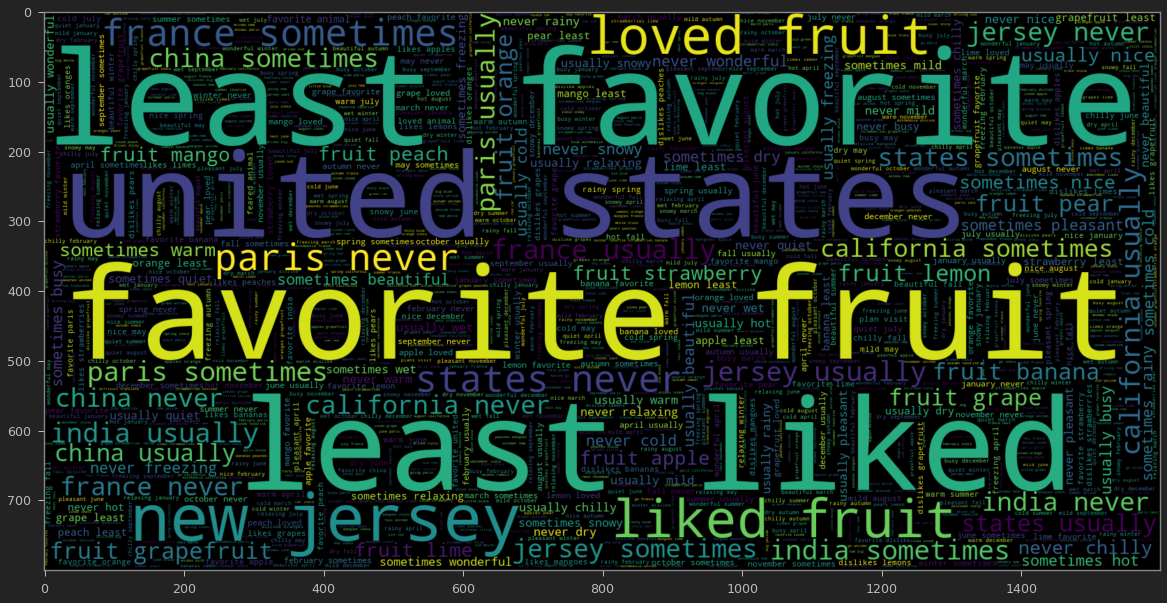

In [15]:
# PLOTTING A WORDCLOUD FOR ENGLISH
plt.figure(figsize = (20, 20))
wc = WordCloud(max_words = 2000, width = 1600, height = 800).generate(" ".join(df.english))


plt.imshow(wc, interpolation='bilinear')

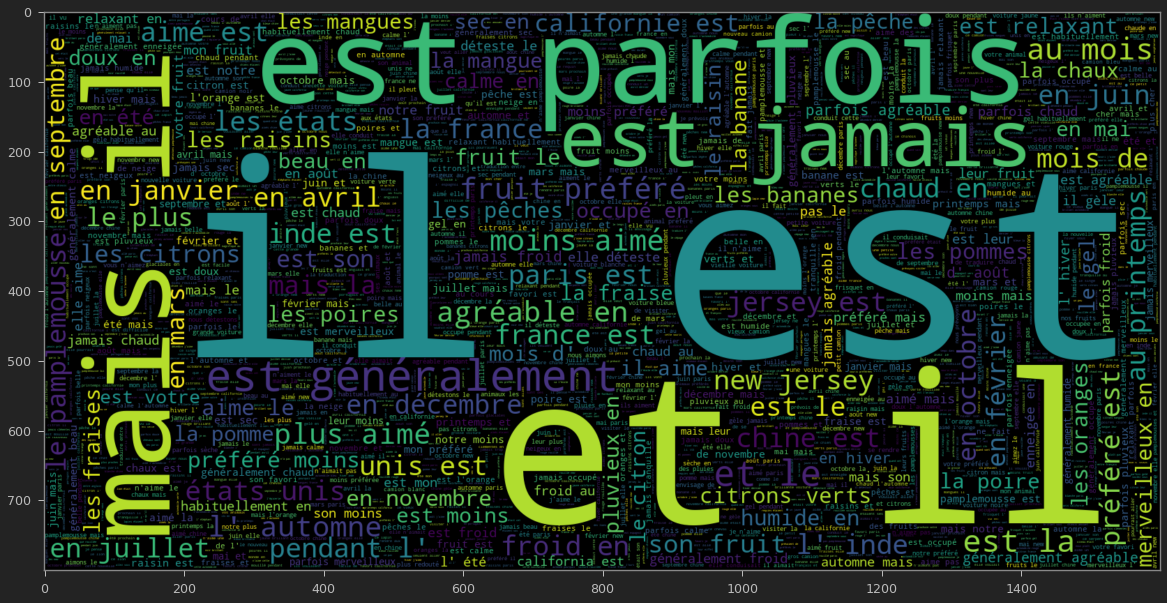

In [16]:
# PLOTTING WORDCLOUD FOR FRENCH LANGUAGE
plt.figure(figsize = (20, 20))
wc = WordCloud(max_words = 2000, width = 1600, height = 800).generate(" ".join(df.french))


plt.imshow(wc, interpolation='bilinear')

In [17]:
# FINDING THE MAXIMUM LENGTH IN THE ENGLISH DATAFRAME

maxlen_english = 0
for doc in df.english:
    tokens = nltk.word_tokenize(doc)
    if maxlen_english < len(tokens):
        maxlen_english = len(tokens)
maxlen_english

15

In [18]:
# FINDING THE MAXIMUM LENGTH IN THE FRENCH DATAFRAME

maxlen_french = 0
for doc in df.french:
    tokens = nltk.word_tokenize(doc)
    if maxlen_french< len(tokens):
        maxlen_french = len(tokens)
maxlen_french

23

### STEP 5: PREPARING THE DATA BY PERFORMING TOKENIZING AND PADDING

In [19]:
# CONVERTING OUR TEXT TO NUMBERS TO BUILD AI MODEL

def tokenize_and_pad(x, maxlen):
    tokenizer = Tokenizer(char_level = False)
    tokenizer.fit_on_texts(x)
    sequences = tokenizer.texts_to_sequences(x)
    padded = pad_sequences(sequences, maxlen = maxlen, padding = 'post')  #TO MAKE LENGTH OF EACH TOKENIZED TEXT EQUAL
    return tokenizer, sequences, padded

x_tokenizer, x_sequences, x_padded = tokenize_and_pad(df.english, maxlen_english)
y_tokenizer, y_sequences, y_padded = tokenize_and_pad(df.french, maxlen_french)



In [20]:
# TRAIN AND TEST SPLITTING THE DATASET
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_padded, y_padded, test_size = 0.1)

### STEP 6: BUILDING AND TRAINING THE LSTM MODEL

In [21]:
# TOTAL VOCAB SIZE, SINCE WE ADDED PADDING QE ADD 1 TO THE TOTAL WORD COUNT

english_vocab_size = len(english_words) + 1
french_vocab_size = len(french_words) + 1

# SEQUENTIAL MODEL
model = Sequential()

# ADDING EMBEDDING LAYER

model.add(Embedding(english_vocab_size, 256, input_length = maxlen_english, mask_zero = True))
model.add(LSTM(256))

# DECODER
# ADDING REPEAT VECTOR

model.add(RepeatVector(maxlen_french))
model.add(LSTM(256, return_sequences = True))
model.add(TimeDistributed(Dense(french_vocab_size, activation = 'softmax')))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 15, 256)           51200     
_________________________________________________________________
lstm (LSTM)                  (None, 256)               525312    
_________________________________________________________________
repeat_vector (RepeatVector) (None, 23, 256)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 23, 256)           525312    
_________________________________________________________________
time_distributed (TimeDistri (None, 23, 351)           90207     
Total params: 1,192,031
Trainable params: 1,192,031
Non-trainable params: 0
_________________________________________________________________


In [22]:
# CHANGING SHAPE OF TARGET FROM 2D TO 3D
y_train = np.expand_dims(y_train, axis = 2)
y_train.shape

(124074, 23, 1)

In [23]:
# FINALLY TRAINING THE MODEL
 
model.fit(X_train, y_train, batch_size = 1024, validation_split = 0.1, epochs = 15)

Train on 111666 samples, validate on 12408 samples
Epoch 1/15
111666/111666 [==============================] - 438s 4ms/sample - loss: 2.7099 - accuracy: 0.4960 - val_loss: 2.1028 - val_accuracy: 0.5436
Epoch 2/15
111666/111666 [==============================] - 428s 4ms/sample - loss: 1.8486 - accuracy: 0.5748 - val_loss: 1.6027 - val_accuracy: 0.6059
Epoch 3/15
111666/111666 [==============================] - 426s 4ms/sample - loss: 1.5039 - accuracy: 0.6187 - val_loss: 1.3974 - val_accuracy: 0.6377
Epoch 4/15
111666/111666 [==============================] - 423s 4ms/sample - loss: 1.2995 - accuracy: 0.6550 - val_loss: 1.2134 - val_accuracy: 0.6691
Epoch 5/15
111666/111666 [==============================] - 421s 4ms/sample - loss: 1.1175 - accuracy: 0.6890 - val_loss: 1.0659 - val_accuracy: 0.6963
Epoch 6/15
111666/111666 [==============================] - 423s 4ms/sample - loss: 0.9671 - accuracy: 0.7246 - val_loss: 0.9148 - val_accuracy: 0.7378
Epoch 7/15
111666/111666 [===========

In [24]:
# SAVING THE MODEL

model.save("Translator.h5")

### STEP 7: ASSES TRAINED MODEL PERFORMANCE

In [ ]:
y_predict = model.predict(X_test)

def prediction(X, X_tokenizer = x_tokenizer, y_tokenizer = y_tokenizer):
    predictions = model.predict(X)
    id_to_word = {id: word for word, id in y_tokenizer.words_index.items()}
    id_to_word[0] = ''
    return ''.join([id_to_word[j] for j in np.argmax(predictions, 1)])

def pad_to_text(padded, tokenizer):
    id_to_word = {id: word for word, id in tokenizer.word_index.items()}
    id_to_word[0] = ''
    return ''.join([id_to_word[j] for j in padded])


for i in range(5):
    print('Original English Text - {}\n'.format(pad_to_text(X_test[i], X_tokenizer)))
    print('Original French Text - {}\n'.format(pad_to_text(y_test[i], y_tokenizer)))
    print('Predicted French Text - {}\n\n\n'.format(prediction(X_test[i:i+1])))